**PERCOLATION ON BOOLEAN NETWORKS**

Percolation theory describes how the size of clusters of connected set of edges of large random networks
varies as the connectivity - i.e. the probability that two vertices are connected by an edge - changes. As the
connectivity increases the system undergoes a transition from a situation where the clusters are small in size to
a picture with significantly larger clusters. This transition is not smooth, but rather it happens sharply as the
connectivity crosses a critical value, called percolation threshold. The scope of the present project is to study
numerically this phenomenon in Boolean networks.

In [23]:
import numpy as np #for linear algebra
import math
from collections import deque  #for BFS algorithm
import matplotlib.pyplot as plt #for charts

**Poisson Process on a Plane**

 To define Boolean model networks we need to introduce first Poisson processes on the plane. A
random set of points $X$ $⊂$ $R^2$
 is said to be a Poisson process of density $\lambda$ > 0 on the plane if it
satisfies the following conditions:

* Let $X(D)$ denote the random number of points of X inside a domain D. For mutually disjoint sets $D_1$, $D_2$, ..., $D_k$ $ ⊂$ $R^2$, the random variables $X(D_1)$, $X(D_2)$, ..., $X(D_k)$ are independent.
  
* Let $|D|$ denote the area of a domain $D$. For any bounded $D ⊂ R^2$ and any k ≥ 0, it holds
 
 
 $$
  P(X(D) = k) = \frac{e^{-\lambda |D|} (\lambda |D|)^k}{k!}
  $$


That is $X(D)$ $\sim$ $Poi(\lambda |D|)$. In particular, as a consequence, the mean number of points of $X$ in $D$ is $E[X(D)] = \lambda|D|$


We first create a function for simulating a Poisson Process on a Plane, having as inputs the density of the Poisson process $\lambda$ and the dimension T of the square domain.

**CHAPTER 1. POISSON PROCESS ON A PLANE**

In [24]:
def simulate_poisson_process_on_plane(T, lam):
        
        N = np.random.poisson(lam * T**2) #produce the N points according to a Poisson distribution of parameter (lambda * T^2). T^2 since we are considering a square domain

        # Assign the coordinates to the N points
        if N == 0:
            return np.array([])  # if 0 points have been produced return an empty array
        else: #generate a random matrix of numbers following a uniform distribution with dimensions N rows(points) X 2 columns (coordinates)
            points = np.random.rand(N, 2) * T  #moltiplicate for T for distribute points in T dimension (not just between 0-1)
            return points #return coordinates of the points


We create a function to create a scatterplot for visualizing the points of the Poisson Process on a Plane.

In [25]:
def simulate_and_plot_poisson_process_on_plane(T, lam):

        
    #generate the points of the poisson process   
    points = simulate_poisson_process_on_plane(T, lam)

    # Plotting
    plt.figure(figsize=(6, 6))
    if points.size > 0:  # Check if there are any points to plot
        plt.scatter(points[:, 0], points[:, 1], color='blue', alpha=0.7)  # First coordinate of points, and second coordinate of the points. Alpha for transparency of points
    plt.title(f'Poisson Process Simulation on Square with dimensions [0, {T}] x [0, {T}]')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(0, T)
    plt.ylim(0, T)
    plt.grid(True)
    plt.show()

    return f'NUMBER OF POINTS: {len(points)}'
    return f'COORDINATES OF THE POINTS: {points}'
    


We now produce an example of the 2 previous functions for creating and plotting a Poisson Process on a Plane.

In [26]:
T = 60 # dimension of the square domain
lam = 0.1  # Density (lambda) of the poisson process

simulate_poisson_process_on_plane(T, lam)[0:20] #first 20 points

array([[51.13198976, 18.5499007 ],
       [30.6058319 , 18.38645883],
       [11.06200874,  0.65621283],
       [ 0.73283439, 39.77184627],
       [30.71480107, 47.41016984],
       [20.62255456, 19.8496668 ],
       [48.902249  , 55.16095355],
       [45.71694923, 42.72781327],
       [57.26942403, 34.79496655],
       [37.16859164, 25.66851176],
       [15.18449952, 53.93812208],
       [ 3.19713404,  8.43494025],
       [13.95314029, 25.97680029],
       [57.32257815, 34.96348892],
       [43.64376714, 41.4536498 ],
       [49.23615861, 51.8132338 ],
       [27.81797818, 55.02381254],
       [23.01225072,  3.18221433],
       [ 4.99049608, 54.23136297],
       [59.46707115, 19.04182789]])

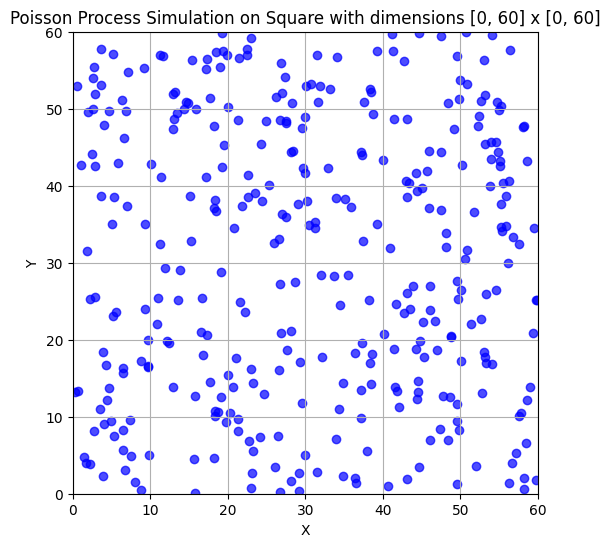

'NUMBER OF POINTS: 353'

In [27]:
T = 60 # dimension of the square domain
lam = 0.1  #density (lambda) of the poisson process

# Simulate Poisson process
simulate_and_plot_poisson_process_on_plane(T, lam)


Now we produce the code for the **probability mass function** of a Poisson process on a plane: probability of having k points in a domain D of size T X T, given a Poisson Process on a Plane of density $\lambda$:

$$
  P(X(D) = k) = \frac{e^{-\lambda |D|} (\lambda |D|)^k}{k!}
  $$

In [28]:
def poisson_process_on_a_plane_probability_mass_function(lam, k, D_area): #inputs: density of the poisson process lambda, k points, domain area

    # Calculate e^(-lambda * domain area)
    exp_term = np.exp(-lam * D_area)

    # Calculate e^(-lambda * domain area) * (lambda * area)^k 
    numerator = exp_term * (lam * D_area)**k 

    # Calculate the PMF value
    pmf_value = numerator / math.factorial(k)

    return f"The probability of having {k} points in a plane of area {D_area} given a Poissson process on a plane with density lambda equal to {lam} is: {pmf_value}"



Example probability mass function of a Poisson Process on a Plane:

In [29]:
lambda_val = 0.1 # Lambda parameter
k_val = 2        # Number of points/events
area_val = 100   # Area of the domain

poisson_process_on_a_plane_probability_mass_function(lambda_val, k_val, area_val)

'The probability of having 2 points in a plane of area 100 given a Poissson process on a plane with density lambda equal to 0.1 is: 0.0022699964881242427'

Create a function for the **expectation** of a Poisson Process on a Plane 

$E[X(D)] = \lambda|D|$

In [30]:
def poisson_process_on_a_plane_expectation(lam, D_area):  #inputs: density of the poisson process lambda, domain area
  return f'The expected number of points for a poisson process on a plane of Area {D_area} is: {lam* D_area}'


Example expectation of a Poisson Process on a Plane:

In [31]:
lambda_val = 0.1 # Lambda parameter
area_val = 3600 # Area of the domain

poisson_process_on_a_plane_expectation(lambda_val, area_val)

'The expected number of points for a poisson process on a plane of Area 3600 is: 360.0'

**CHAPTER 2. BOOLEAN RANDOM NETWORK**

A **Boolean random
network** on the plane, denoted by ($X$, $\lambda$, $r$) , is constructed as follows: given a realization of the
Poisson process $X$, two elements *x*, *y* $\in$ $X$ are connected if their Euclidean distance is smaller than
or equal to $2r$. This geometrically corresponds to placing discs of radius $r$ at the points of the
Poisson process and considering connected components formed by clusters of overlapping discs.

We create now a 2 functions:
* one for computing the number of clusters given a list of points 
* one for computing the average number of clusters for a poisson process on a plane over a number of M simulations

they both apply the BFS algorithm for finding the clusters

In [32]:
#############################
## FIND NUMBER OF CLUSTERS###
#############################
def find_clusters(points, r): #INPUT: numpy array with the coordinates of the points (the must be produced with a poisson process on a plane) / radius r
   
    def bfs(node, visited): #Breadth-Fist Search algorithm
        queue = deque([node]) 
        cluster = []
        while queue:
            v = queue.popleft()
            if tuple(v) not in visited:
                visited.add(tuple(v))
                cluster.append(v)
                neighbors = [w for w in points if np.linalg.norm(v - w) <= 2 * r and tuple(w) not in visited]
                queue.extend(neighbors)
        return cluster

    visited = set() #INITIALIZATION: 0 visited points and 0 clusters
    clusters = []  # List of clusters MODIFICATO

    for point in points: #if a point has not been visited it is passed to bfs algorithm and increments the number of clusters 
        if tuple(point) not in visited:
            cluster = bfs(point, visited)
            clusters.append(cluster)  # ADD CLUSTER TO THE LIST MODIFICATO

    return clusters #OUTPUT: number of clusters


#############################################################################
## FIND  AVERAGE NUMBER OF CLUSTERS IN M SIMULATIONS OF A POISSON PROCESS ###
#############################################################################

def simulate_boolean_network_avg_number_of_clusters(T, lam, M):

    r = 1
    num_clusters_list = []

    for _ in range(M): #for every iteration...
        
        points = simulate_poisson_process_on_plane(T, lam) #1. simulate poisson process on plane for generating the points

        clusters = find_clusters(points, r)  #2. find_clusters now returns the list of clusters
        num_clusters = len(clusters)  #3. Calculate the number of clusters
        num_clusters_list.append(num_clusters) #4. append the number of cluster for that specific simulation (than compute the average number of clusters)
        
    # Compute average number of clusters
    avg_num_clusters = np.mean(num_clusters_list) #compute the average number of clusters

    return avg_num_clusters




In [33]:

T = 100  # Size of the square domain
lam = 0.1  # Density parameter for Poisson process
M = 40 # Number of simulations

# Perform simulation
avg_num_clusters = simulate_boolean_network_avg_number_of_clusters(T, lam, M)

print(f"Average number of clusters: {avg_num_clusters}")

Average number of clusters: 515.725


**CHAPTER 3. RUNNING SIMULATIONS TO DISCOVER HOW THE SIZE OF THE SIZE OF THE LARGEST CLUSTER DEPENDS ON LAMBDA**

* set T: size of the dimension of the square domain (60)
* set M: number of simulations (100)
* let lambda varying


We create a function that given:
* T dimension of square domain
* Lambda
* M number of simulations

Produce:
* 1. average number of points
* 2. average number of points inside the biggest cluster
* 3. size (in terms of number points) of the biggest cluster
* 4. average number of clusters

In [34]:
def largest_cluster_size(clusters): #given a list of clusters (each of these are a list of points) return the SIZE of the largest cluster
    
    if not clusters:
        return 0
    largest_size = max(len(cluster) for cluster in clusters)
    return largest_size


################################################################################################
## FIND NUMBER OF POINTS AND NUMBER OF POINTS INSIDE THE BIGGEST CLUSTER IN A BOOLEAN NETWORK###
################################################################################################

                                                    #given T dimension of square domani, lambda e number od simulations M
def simulate_boolean_network_complete(T, lam, M): #return the 1. AVERAGE NUMBER OF POINTS and 2. AVERAGE NUMBER OF POINTS INSIDE THE BIGGEST CLUSTER
    
    r = 1
    largest_cluster_sizes = []
    total_num_points = []
    num_clusters_list = []

    for _ in range(M): #for every simulation...
        
        points = simulate_poisson_process_on_plane(T, lam) #1. simulate poisson process on plane for generating the points

        # Record number of points
        total_num_points.append(len(points)) #2. append the number of point generated by each simulation

        # Find clusters
        clusters = find_clusters(points, r) #3. identify the clusterss
        size_of_largest_cluster = largest_cluster_size(clusters) #4.use the previous function to detect the largest cluster
        largest_cluster_sizes.append(size_of_largest_cluster) #5. append the number of points of the largest cluster for the current simulation 
        num_clusters_list.append(len(clusters)) #6. track average number of clusters
        
        
    # Compute average size of the largest cluster and average number of points
    avg_largest_cluster_size = np.mean(largest_cluster_sizes)
    avg_num_points = np.mean(total_num_points)
    avg_percent_points_in_largest_cluster = (avg_largest_cluster_size / avg_num_points) * 100
    avg_num_clusters = np.mean(num_clusters_list)

    return avg_largest_cluster_size, avg_num_points, avg_percent_points_in_largest_cluster, avg_num_clusters

Example: produce a boolean network and return the total number of points and the number of points in the biggest cluster

In [35]:
# Parameters AUMENTA IL NUMERO DI SIMULAZIONI
T = 100  # Size of the dimension of the square domain
lam = 0.20  # Density parameter for Poisson process
M = 40  # Number of simulations

# Perform simulation
avg_largest_cluster_size, avg_num_points, avg_percent_points_in_largest_cluster, avg_num_clusters = simulate_boolean_network_complete(T, lam, M)

print(f"The average number of points is: {avg_num_points}")
print(f"Average size of the largest cluster: {avg_largest_cluster_size}")
print(f"Percentage of points in the largest cluster: {avg_percent_points_in_largest_cluster} %")
print(f"Average number of clusters: {avg_num_clusters}")


The average number of points is: 2003.9
Average size of the largest cluster: 53.025
Percentage of points in the largest cluster: 2.6460901242576975 %
Average number of clusters: 464.675


Reproduce the same example with the threshold value of lambda:
$$
\lambda_c \approx \frac{4.512}{4 \pi} \approx 0.359
$$

In [36]:
# Parameters

T = 100  # Size of the dimension of the square domain
lam = (4.513/(4*math.pi)) # THRESHOLD VALUE Density parameter for Poisson process
M = 40  # Number of simulations

# Perform simulation
avg_largest_cluster_size, avg_num_points, avg_percent_points_in_largest_cluster, avg_num_clusters = simulate_boolean_network_complete(T, lam, M)

print(f"The average number of points is: {avg_num_points}")
print(f"Average size of the largest cluster: {avg_largest_cluster_size}")
print(f"Percentage of points in the largest cluster: {avg_percent_points_in_largest_cluster} %")
print(f"Average number of clusters: {avg_num_clusters}")


The average number of points is: 3604.475
Average size of the largest cluster: 1948.175
Percentage of points in the largest cluster: 54.04878657779566 %
Average number of clusters: 127.55


**3.1 PLOTTING THE RESULTS TO DISCOVER HOW THE THE SIZE OF THE SIZE OF THE LARGEST CLUSTER DEPENDS ON LAMBDA**

We create a table having on the **X axis the values of lambda** and on the **Y axis the percentage of points belonging to the biggest cluster**

In [37]:
#parameters

T = 100  # Size of the square domain
lambda_values = np.arange(0.1, 0.42, 0.02)  # Lambda values
M = 20 # Number of simulations
lambda_threshold = 4.512 / (4 * np.pi)  # Threshold lambda value

# Perform simulation
results = []

for lam in lambda_values:
    avg_largest_cluster_size, avg_num_points, avg_percent_points_in_largest_cluster, avg_num_clusters = simulate_boolean_network_complete(T, lam, M)
    results.append((lam, avg_largest_cluster_size, avg_num_points, avg_percent_points_in_largest_cluster, avg_num_clusters))


# Plotting the results
lambda_vals = [result[0] for result in results]
percent_points_largest_cluster = [result[3] for result in results]

plt.figure(figsize=(10, 6))
plt.plot(lambda_vals, percent_points_largest_cluster, marker='o', linestyle='-', color='b')
plt.axvline(x=lambda_threshold, color='r', linestyle='--', label=f'λc = {lambda_threshold:.3f}')
plt.xlabel('Lambda (λ)')
plt.ylabel('Percentage of Points in the Largest Cluster (%)')
plt.title('Percentage of Points in the Largest Cluster vs Lambda\nSquare domain [0,100] x [0,100]')
plt.legend()
plt.grid(True)
plt.show()


We create a table having on the **X axis the values of lambda** and on the **Y axis the number of points belonging to the biggest cluster**

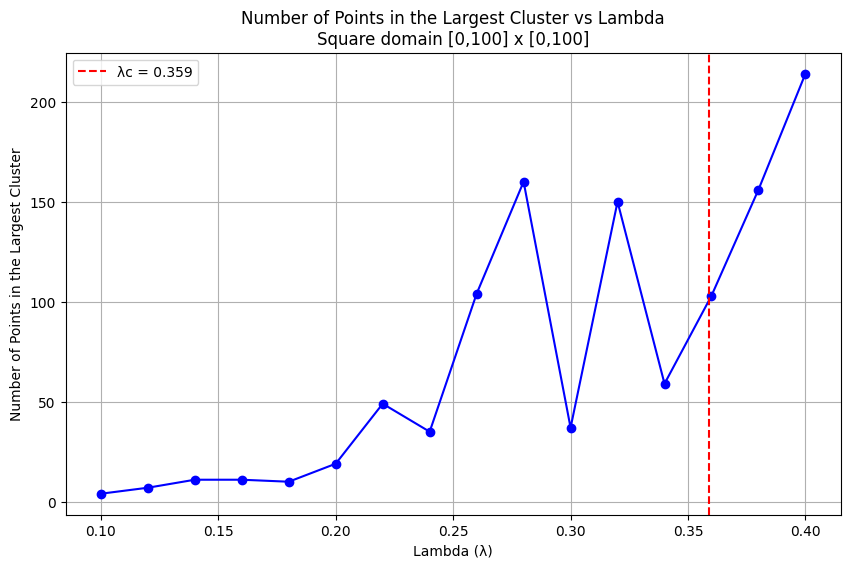

In [ ]:
# Parameters
T = 100 # Size of the square domain
lambda_values = np.arange(0.1, 0.42, 0.02)  # Lambda values
M = 20  # Number of simulations
lambda_threshold = 4.512 / (4 * np.pi)  # Threshold lambda value

# Perform simulation
results = []

for lam in lambda_values:
    avg_largest_cluster_size, avg_num_points, avg_percent_points_in_largest_cluster, avg_num_clusters = simulate_boolean_network_complete(T, lam, M)
    results.append((lam, avg_largest_cluster_size, avg_num_points, avg_percent_points_in_largest_cluster, avg_num_clusters))


# Plotting the results
lambda_vals = [result[0] for result in results]
largest_cluster_sizes = [result[1] for result in results]

plt.figure(figsize=(10, 6))
plt.plot(lambda_vals, largest_cluster_sizes, marker='o', linestyle='-', color='b')
plt.axvline(x=lambda_threshold, color='r', linestyle='--', label=f'λc = {lambda_threshold:.3f}')
plt.xlabel('Lambda (λ)')
plt.ylabel('Number of Points in the Largest Cluster')
plt.title('Number of Points in the Largest Cluster vs Lambda\nSquare domain [0,100] x [0,100]')
plt.legend()
plt.grid(True)
plt.show()

**3.2 HOW THE NUMBER OF CLUSTERS DEPENDS ON LAMBDA**

We create a table having on the **X axis the values of lambda** and on the **Y axis the number of clusters**


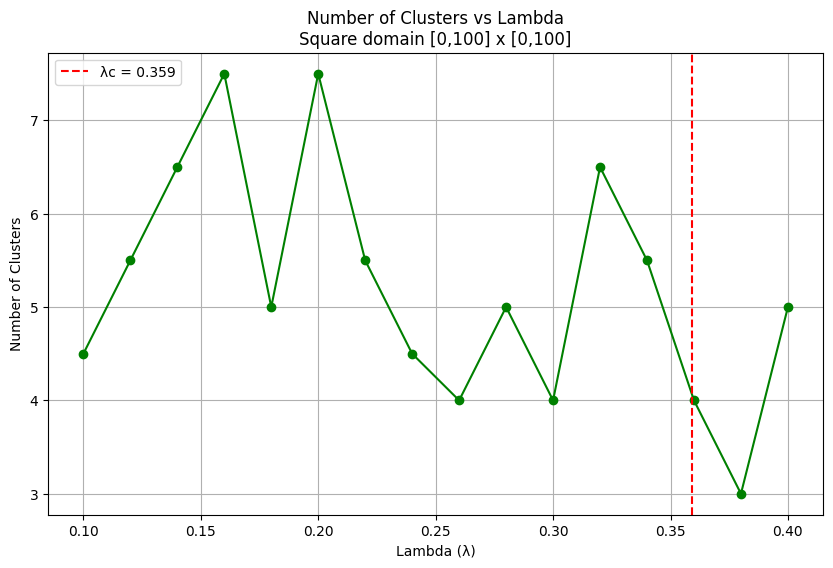

In [ ]:
# Parameters
T = 100  # Size of the square domain
lambda_values = np.arange(0.1, 0.42, 0.02)  # Lambda values
M = 20  # Number of simulations
lambda_threshold = 4.512 / (4 * np.pi)  # Threshold lambda value

# Perform simulation
results = []

for lam in lambda_values:
    avg_num_clusters = simulate_boolean_network_number_of_clusters(T, lam, M)
    results.append((lam, avg_num_clusters))

# Plotting the results
lambda_vals = [result[0] for result in results]
num_clusters = [result[1] for result in results]
plt.figure(figsize=(10, 6))
plt.plot(lambda_vals, num_clusters, marker='o', linestyle='-', color='g')
plt.axvline(x=lambda_threshold, color='r', linestyle='--', label=f'λc = {lambda_threshold:.3f}')
plt.xlabel('Lambda (λ)')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs Lambda\nSquare domain [0,100] x [0,100]')
plt.legend()
plt.grid(True)
plt.show()
